# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [41]:
data = load_iris()

In [42]:
data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [43]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 特徴量の確認
1) sepal length (cm)
2) sepal width (cm)
3) petal length (cm)
4) petal width (cm)

＃日本語訳
1) がくの長さ
2) がくの幅
3) 花弁の長さ
4) 花弁の幅

In [44]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

# 目的変数の確認
1) アイリスセトサ
2) アイリスバージカラー
3) アイリスバージニカ
すべてアイリスの花の種類である

# 仮説を立てる
・アイリスデータと呼ばれどうやら有名なデータセットみたい
・アヤメの３品種に関するデータが150種類入っている。
・がくの長さとがくの幅に強い正の相関がありそう
・花弁の長さと花弁の幅に強い正の相関がありそう

In [80]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

# データの分析

# 箱ひげ図

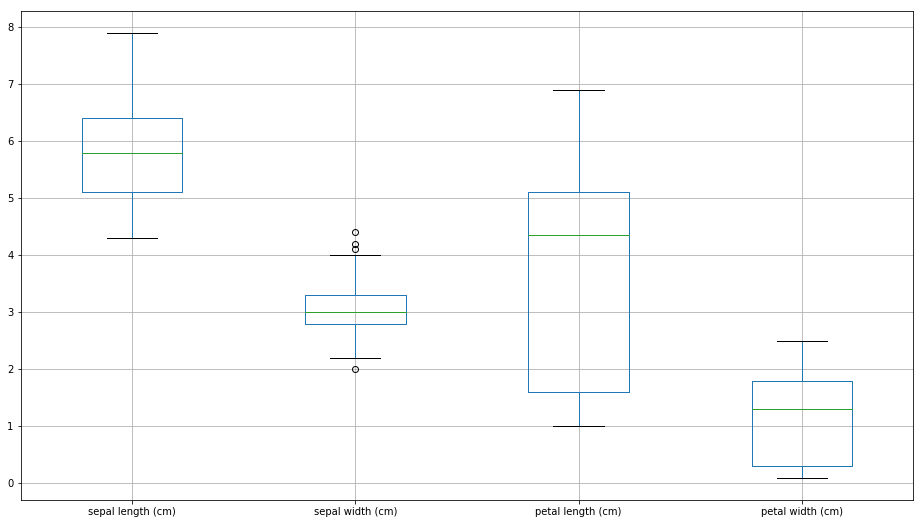

In [83]:
df.boxplot(figsize=(16,9))

#各特徴量の散布図

In [84]:
import seaborn as sns

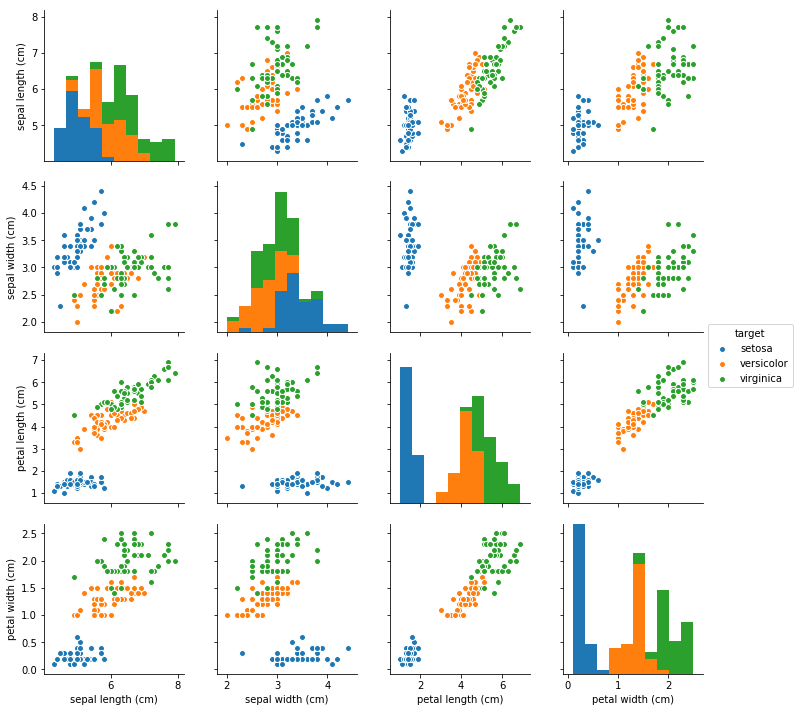

In [85]:
sns.pairplot(df, hue="target")

＃組み合わせによってどこに相関があるか調べる

In [86]:
corr = df.corr().values
[[df.columns[i], df.columns[j], corr[i][j]] for i in range(df.shape[1]-1) for j in range(df.shape[1]-1) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1]

[['sepal length (cm)', 'petal length (cm)', 0.8717541573048719],
 ['sepal length (cm)', 'petal width (cm)', 0.8179536333691635],
 ['sepal width (cm)', 'petal length (cm)', -0.42051609640115484],
 ['petal length (cm)', 'sepal length (cm)', 0.8717541573048719],
 ['petal length (cm)', 'sepal width (cm)', -0.42051609640115484],
 ['petal length (cm)', 'petal width (cm)', 0.9627570970509667],
 ['petal width (cm)', 'sepal length (cm)', 0.8179536333691635],
 ['petal width (cm)', 'petal length (cm)', 0.9627570970509667]]

がくの長さと花弁の幅にのみ負の相関がみられた。

Text(0,0.5,'petal width (cm)')

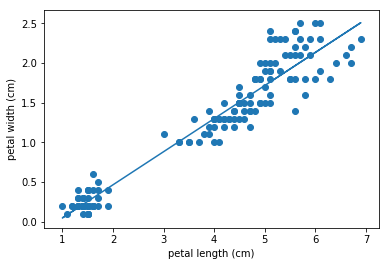

In [93]:
# 線形回帰で学習
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = df["petal length (cm)"].values.reshape(-1, 1)
Y = df["petal width (cm)"]
clf.fit(X, Y)
clf.coef_, clf.intercept_, clf.score(X, Y) 
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

Text(0,0.5,'sepal width (cm)')

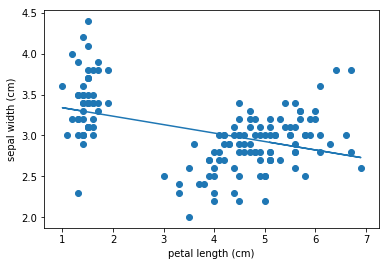

In [95]:
# 線形回帰で学習
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = df["petal length (cm)"].values.reshape(-1, 1)
Y = df["sepal width (cm)"]
clf.fit(X, Y)
clf.coef_, clf.intercept_, clf.score(X, Y) 
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")

#モデルの学習

In [87]:
x = iris.data[:, [0, 2]] 
y = iris.target

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[data["feature_names"]],df["target"], test_size=0.2, random_state=1)


In [100]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

#SVM

In [101]:
from sklearn.svm import SVC

In [103]:
clf = SVC(random_state=0)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
pred = clf.predict(x_test)
pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
accuracy_score(pred, y_test), precision_score(pred, y_test, average=None), \
recall_score(pred, y_test, average=None), f1_score(pred, y_test, average=None)

(0.9666666666666667,
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.96      , 0.92307692]))

#K近傍法

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[data["feature_names"]],df["target"], test_size=0.2, random_state=0)
clf = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
round(clf.score(x_test, y_test), 3)

0.967

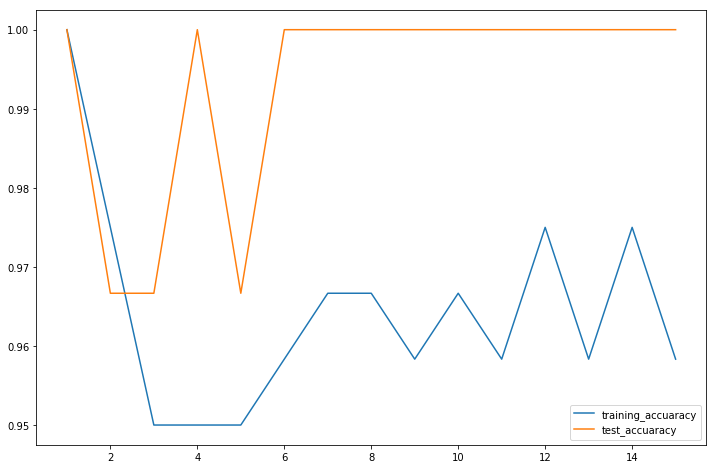

In [137]:
training_accuaracy = []
test_accuaracy = []
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    training_accuaracy.append(clf.score(x_train, y_train))
    test_accuaracy.append(clf.score(x_test, y_test))

fig, axes = plt.subplots(figsize = (12, 8))
plt.plot(neighbors_settings, training_accuaracy, label='training_accuaracy')
plt.plot(neighbors_settings, test_accuaracy, label='test_accuaracy')
plt.legend()

# 仮説の確認


がくの長さと花弁の幅に負の相関がみられた。
その他は正の相関があったため、がくの長さと幅、花弁の長さと幅には正の相関があった。